In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import random as rd
from PIL import Image

np.random.seed(42)

In [6]:
df = pd.read_csv('word_data_with_size_outlier.csv')
df.drop(['width', 'height', 'aspect_ratio'], axis=1, inplace=True)
df.drop(df.loc[df['is_outlier']==True].index, axis=0, inplace=True)
df

,image_file_name,sex,age,age_range,word,word_len,is_outlier
0,IMG_OCR_53_4PR_09305_1.png,female,41,40s,강원도,3,False
1,IMG_OCR_53_4PR_09305_2.png,female,41,40s,경상북도,4,False
2,IMG_OCR_53_4PR_09305_3.png,female,41,40s,경기도,3,False
3,IMG_OCR_53_4PR_09305_4.png,female,41,40s,인제군,3,False
4,IMG_OCR_53_4PR_09305_5.png,female,41,40s,영광군,3,False
...,...,...,...,...,...,...,...
462888,IMG_OCR_53_4PR_99941_28.png,male,22,20s,서운면,3,False
462889,IMG_OCR_53_4PR_99941_29.png,male,22,20s,복세편살,4,False
462890,IMG_OCR_53_4PR_99941_30.png,male,22,20s,버카충,3,False
462891,IMG_OCR_53_4PR_99941_31.png,male,22,20s,별다줄,3,False


In [7]:
age_range = sorted(df['age_range'].unique())
word_len = sorted(df['word_len'].unique())

print('')
print('나이대:', age_range)
print('글자크기:', word_len)


나이대: ['10s', '20s', '30s', '40s', '50s']
글자크기: [2, 3, 4]


[]

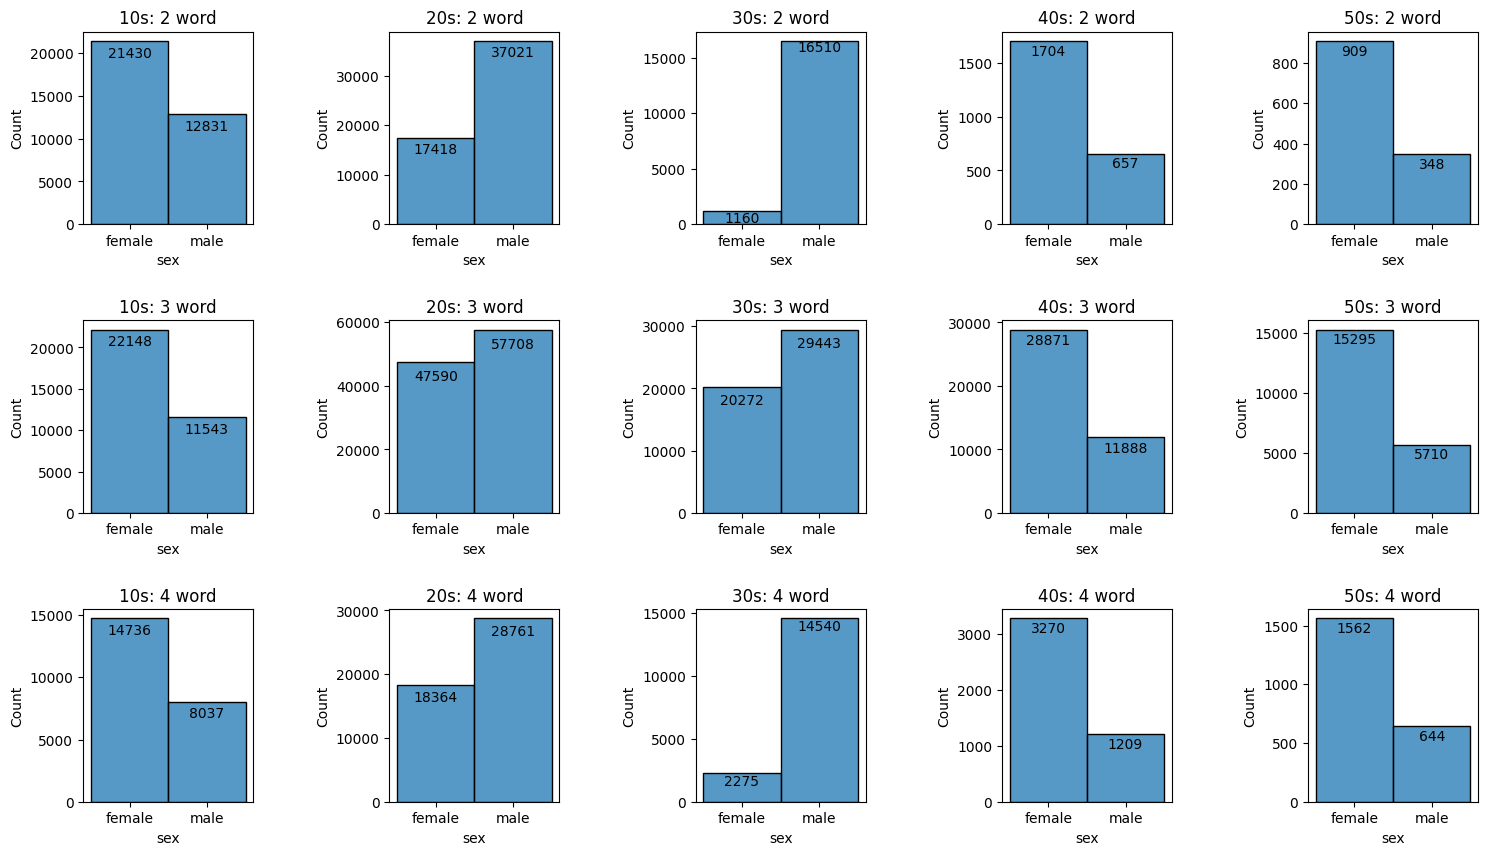

In [8]:
f, ax = plt.subplots(3, 5, figsize=(18, 10))

for i, len in enumerate(word_len):
    for j, age in enumerate(age_range):
        cur_df = df[(df['age_range']==age) & (df['word_len']==len)]
        sns.histplot(cur_df['sex'], ax=ax[i, j])
        ax[i, j].set_title(f'{age}: {len} word')

        for p in ax[i, j].patches:
            ax[i, j].text(p.get_x() + (p.get_width()/2), p.get_height() - cur_df.size * 0.008, f"{p.get_height()}", ha = 'center')

plt.subplots_adjust(hspace=0.5, wspace=0.8)
plt.plot()

# 남여 비율이 같도록 하여, 이미지를 Numpy 배열로 만들기

In [9]:
def getImageArray(cur_df) :
    male_file_name = [(row['image_file_name'], 0) for _, row in cur_df[cur_df['sex'] == 'male'].iterrows()]
    female_file_name = [(row['image_file_name'], 1) for _, row in cur_df[cur_df['sex'] == 'female'].iterrows()]
    target_size = min(np.size(male_file_name), np.size(female_file_name)) // 2

    male_drawed_file_name = rd.sample(male_file_name, target_size)
    female_drawed_file_name = rd.sample(female_file_name, target_size)

    target_file_name = male_drawed_file_name + female_drawed_file_name
    rd.shuffle(target_file_name)
    
    X_list, y_list = [], []

    for file_name, sex in target_file_name:
        img = Image.open(f'./Final_Image_Data/{file_name}')
        arr = np.array(img)
        arr = (255 - arr) / 255.0
        
        X_list.append(arr)
        y_list.append(sex)
    
    X, y = np.array(X_list), np.array(y_list)
    X = np.expand_dims(X, axis=-1)
    y = np.expand_dims(y, axis=-1)

    return X, y

In [10]:
for age in age_range :
    for len in word_len :
        X, y = getImageArray(df[(df['age_range']==age) & (df['word_len']==len)])
        
        np.save(f'./Numpy_Data/{age}_{len}_X.npy', X)
        np.save(f'./Numpy_Data/{age}_{len}_y.npy', y)